# Lecture02

## The support vector classifier (Linear SVM)

### CIS432 Machine Learning for Business Analytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

         X1        X2  class
0 -2.157363 -2.326500   True
1  1.277354 -2.745816  False
2  1.982858 -1.633554   True
3 -2.652544 -0.319240  False
4 -1.251667  2.021942  False 
 (20, 3)


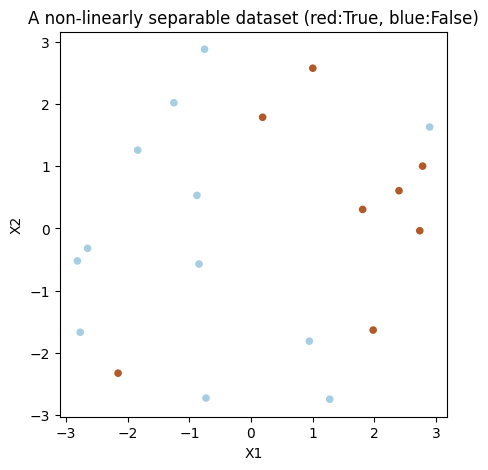

In [ ]:
# Load and visualize a toy dataset
df = pd.read_csv('https://drive.google.com/uc?id=1Q82bbQzzAFUtfiROByH5Xn0oCEKIy7k0&export=download')
print(df.head(), '\n', df.shape)
df.plot.scatter('X1', 'X2', c=df['class'], cmap=plt.cm.Paired, sharex=False, colorbar=False, figsize=(5,5), title='A non-linearly separable dataset (red:True, blue:False)', legend=True);

In [ ]:
# Train an SVC model
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(df[['X1','X2']], df['class'])
print('Linear coefficients:', clf.intercept_[0], clf.coef_[0])

Linear coefficients: -0.45595574625129803 [0.58263619 0.09175189]


In [ ]:
# Use model to make predictions at two observations
print(clf.predict([[3., 3.] , [-3., -3.]]))

[ True False]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Return to the presentation

# Additional plots

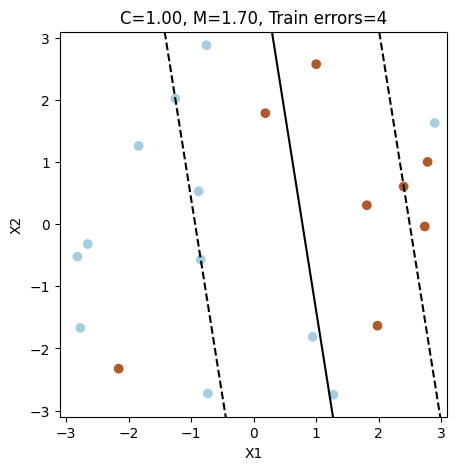

In [ ]:
# Visualize margins
beta1,beta2 = clf.coef_[0]
beta0, M, train_error = clf.intercept_[0], 1/np.sqrt(beta1**2+beta2**2), sum(clf.predict(df[['X1','X2']])!=df['class'])
l=3.1
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
X1_range = [-l,l]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+1-beta1*x1)/beta2, X1_range))
ax.plot(X1_range,X2_hyperplane,'-k'); ax.plot(X1_range,X2_margin1,'--k'); ax.plot(X1_range,X2_margin2,'--k')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_xlim([-l,l]); ax.set_ylim([-l,l]);
ax.set_title("C=%.2f, M=%.2f, Train errors=%d"%(1.0,M,train_error));

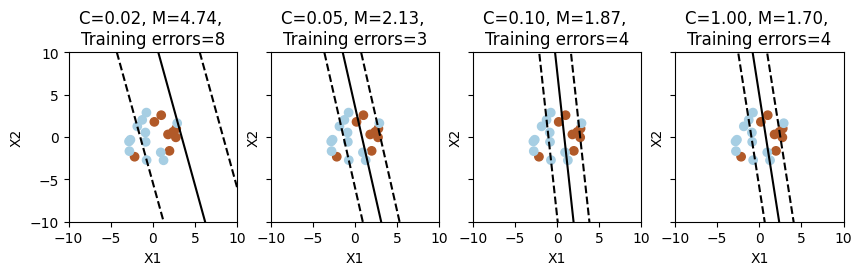

In [ ]:
# Display margins for difference choices of the hyper-parameter C
C_range = [0.02, 0.05, 0.1, 1]
fig, axes = plt.subplots(1,len(C_range), figsize=(10,2.2), sharey=True)
l=10 # display parameter

for i in range(len(C_range)):
    clf = svm.SVC(kernel='linear',C=C_range[i])
    clf.fit(df[['X1','X2']], df['class'])

    beta1,beta2 = clf.coef_[0]
    beta0 = clf.intercept_[0]
    M = 1/np.sqrt(beta1**2+beta2**2) # margin
    training_error=sum(clf.predict(df[['X1','X2']])!=df['class'])

    axes[i].scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
    X1_range = [-l,l]
    X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
    X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
    X2_margin2 = list(map(lambda x1:(-beta0+1-beta1*x1)/beta2, X1_range))

    axes[i].plot(X1_range,X2_hyperplane,'-k')
    axes[i].plot(X1_range,X2_margin1,'--k')
    axes[i].plot(X1_range,X2_margin2,'--k')
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')
    axes[i].set_xlim([-l,l])
    axes[i].set_ylim([-l,l])
    axes[i].set_title("C=%.2f, M=%.2f, \nTraining errors=%d"%(C_range[i],M,training_error))

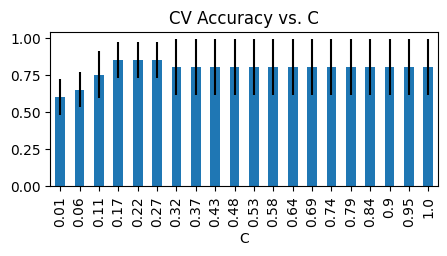

In [ ]:
# Use cross-validation to optimize C
from sklearn.model_selection import cross_val_score
X, Y, results =df[['X1','X2']], df['class'], []
for i in np.linspace(0.01,1,20):
    clf = svm.SVC(kernel='linear',C=i)
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std']).round(2)
df_accuracy.plot.bar(x='C',y='mean',yerr='std', title='CV Accuracy vs. C', figsize=(5,2), legend=False);

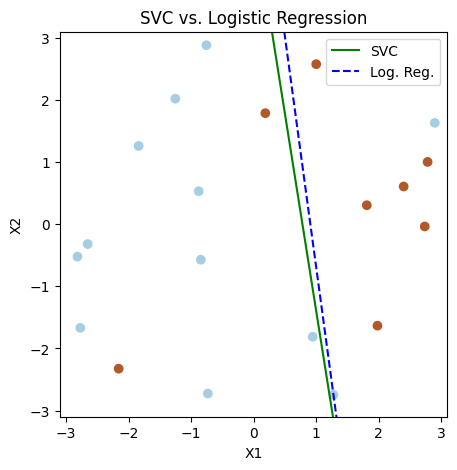

In [ ]:
# Logistic regression vs. SVC
from sklearn.linear_model import LogisticRegression
clf_svm = svm.SVC(kernel='linear').fit(df[['X1','X2']], df['class'])
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(df[['X1','X2']], df['class'])

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
X1_range = [-l,l]
beta1,beta2 = clf_svm.coef_[0]
beta0 = clf_svm.intercept_[0]
X2_svm = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
beta1,beta2 = clf_log.coef_[0]
beta0 = clf_log.intercept_[0]
X2_log = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
l=3.1 # display parameter
ax.plot(X1_range,X2_svm,'-g',label='SVC'); ax.plot(X1_range,X2_log,'--b',label='Log. Reg.')
ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_xlim([-l,l]); ax.set_ylim([-l,l]);
ax.set_title("SVC vs. Logistic Regression"); plt.legend();